In [18]:
import os 
import pandas as pd 
import numpy as np

from biosppy.signals import emg

import torch


class FolderReader:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.dataframes = []

    def read_dataframes(self):
        for archivo in os.listdir(self.folder_path):
            if archivo.endswith('.csv'):
                ruta_archivo = os.path.join(self.folder_path, archivo)
                df = pd.read_csv(ruta_archivo)
                self.dataframes.append(df)

    def get_dataframe(self, index):
        if 0 <= index < len(self.dataframes):
            return self.dataframes[index]
        else:
            return None

    def get_dataframe_names(self):
        return [df.columns.tolist() for df in self.dataframes]
        


carpeta = '../Data' 

folder_reader = FolderReader(carpeta)
folder_reader.read_dataframes()

df = pd.concat(folder_reader.dataframes)

emg_names = ['EMG_CHANNEL_' + str(i+1) for i in range(0,8)]

df_emg_channels = df[emg_names]

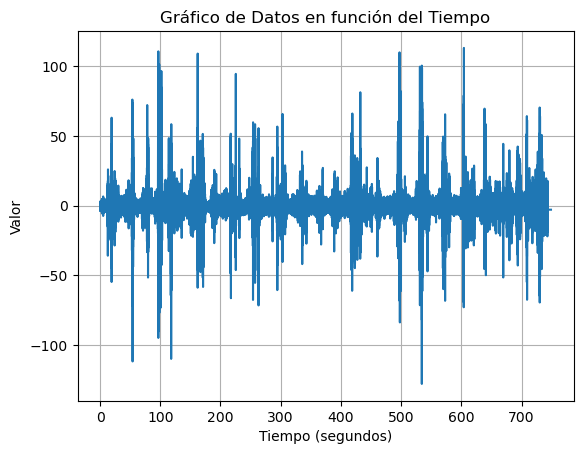

In [20]:
import matplotlib.pyplot as plt

fs = 256
ts = 1/256


eje_tiempo = np.linspace(0, df.shape[0]/fs, df.shape[0])

plt.plot(eje_tiempo, df[['EMG_CHANNEL_1']].reset_index(drop=True)) 
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Valor')
plt.title('Gráfico de Datos en función del Tiempo')
plt.grid(True)
plt.show() 

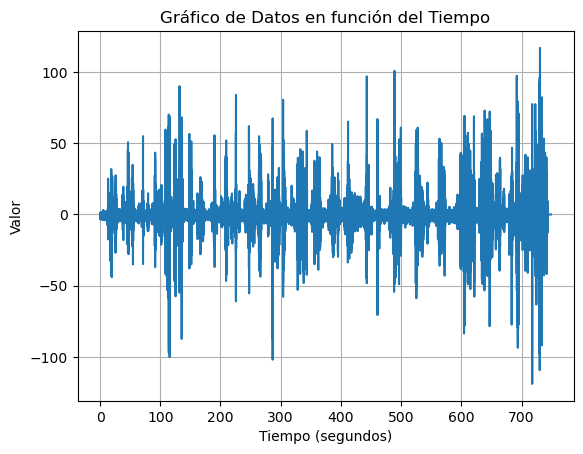

In [22]:

plt.plot(eje_tiempo, df[['EMG_CHANNEL_8']].reset_index(drop=True)) 
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Valor')
plt.title('Gráfico de Datos en función del Tiempo')
plt.grid(True)
plt.show() 

In [16]:
(df.shape[0]/256)/60

12.481770833333334

In [7]:
df[emg_names[0]]

0        1.00000
1       -0.56250
2       -0.43750
3        0.34375
4        0.62500
          ...   
74915   -3.00000
74916   -3.00000
74917   -3.00000
74918   -3.00000
74919   -3.00000
Name: EMG_CHANNEL_1, Length: 191720, dtype: float64

In [12]:
df[['EMG_CHANNEL_1']].reset_index(drop=True)

,EMG_CHANNEL_1
0,1.00000
1,-0.56250
2,-0.43750
3,0.34375
4,0.62500
...,...
191715,-3.00000
191716,-3.00000
191717,-3.00000
191718,-3.00000


In [24]:
df_emg_channels

,EMG_CHANNEL_1,EMG_CHANNEL_2,EMG_CHANNEL_3,EMG_CHANNEL_4,EMG_CHANNEL_5,EMG_CHANNEL_6,EMG_CHANNEL_7,EMG_CHANNEL_8
0,1.00000,-7.00000,-1.00000,3.0000,0.00000,-1.00000,0.00000,-2.00000
1,-0.56250,-0.75000,11.50000,-0.1250,-0.78125,-0.21875,-0.78125,-0.43750
2,-0.43750,-0.12500,6.00000,-1.0000,-1.00000,0.56250,0.68750,-1.12500
3,0.34375,-1.34375,4.15625,-0.3125,-0.65625,0.31250,0.96875,-1.65625
4,0.62500,-1.75000,10.62500,0.5000,-0.12500,-0.87500,-0.87500,-0.87500
...,...,...,...,...,...,...,...,...
74915,-3.00000,6.00000,-19.00000,-3.0000,2.00000,2.00000,-1.00000,0.00000
74916,-3.00000,6.00000,-19.00000,-3.0000,2.00000,2.00000,-1.00000,0.00000
74917,-3.00000,6.00000,-19.00000,-3.0000,2.00000,2.00000,-1.00000,0.00000
74918,-3.00000,6.00000,-19.00000,-3.0000,2.00000,2.00000,-1.00000,0.00000


In [35]:
import numpy as np
import biosppy.signals.emg as bse


window_size = 1000  # en milisegundos

features = []
for i in range(0, len(df_emg_channels), window_size):
    window = df_emg_channels.iloc[i:i+window_size]

    ts, filtered, _ = bse.emg(signal=window['EMG_CHANNEL_1'].values, sampling_rate=256, show=False)
    mav = np.mean(np.abs(filtered))
    wamp = np.sum(np.abs(np.diff(filtered) > 0))
    var = np.var(filtered)
    wl = np.sum(np.abs(np.diff(filtered)))
    mf = bse.frequency.median_frequency(signal=window['EMG_CHANNEL_1'].values, sampling_rate=256)
    mnf = bse.frequency.mean_frequency(signal=window['EMG_CHANNEL_1'].values, sampling_rate=256)
    #target = window['target'].iloc[0]

    features.append([mav, wamp, var, wl])

features_df = pd.DataFrame(features, columns=['mav', 'wamp', 'var', 'wl'])

features_df

AttributeError: module 'biosppy.signals.emg' has no attribute 'frequency'